## Production of the plot $v_a(\rho)$ and the corresponding logarithmic plot 

Produces the plot $v_a(\rho)$ and $v_a([(rho_c(L)$-$rho)/rho_c(L)])$

In [1]:
import VicsekSimulationNumba as vi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator, AutoLocator)
from scipy.optimize import curve_fit
import matplotlib
from scipy import stats


In [10]:
dataPaper = pd.read_csv("Data/vaofrhopaper.csv")
dataCalc = pd.read_csv("vaOfRho2calculatedWithError.csv")

xpaper = np.array(dataPaper)[:,0]
ypaper = np.array(dataPaper)[:,1]
xCalc = np.array(dataCalc)[:,2]
yCalc = np.array(dataCalc)[:,1]

In [11]:
xCalc

array([0.1       , 0.3       , 0.5       , 0.7       , 0.9       ,
       1.1       , 1.3       , 1.4       , 1.64285714, 1.88571429,
       2.12857143, 2.37142857, 2.61428571, 2.85714286, 3.1       ])

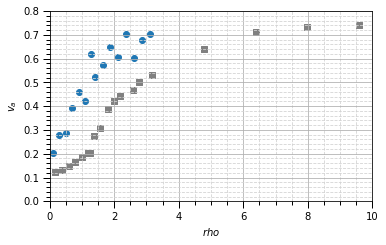

In [14]:
fig = plt.figure()
fig.set_size_inches(w=5.78851, h=3.5)
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlim([0,10])
ax1.set_ylim([0,0.8])

ax1.grid( which="both")

ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.xaxis.set_major_locator(AutoLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_major_locator(AutoLocator())

ax1.tick_params(which='both', width=1)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4, grid_linestyle="--", grid_color="lightgray")



ax1.set_xlabel('$rho$')
ax1.set_ylabel('$v_a$')

plt.scatter(xpaper,ypaper, c = 'grey',  marker = 's', s = 35)
plt.scatter(xCalc, yCalc)

In [26]:
np.log(xCalc)

array([-2.30258509, -1.2039728 , -0.69314718, -0.35667494, -0.10536052,
        0.09531018,  0.26236426,  0.33647224,  0.49643689,  0.63430668,
        0.75545106,  0.86349255,  0.96099091,  1.04982212,  1.13140211])

In [25]:
def func(x, a, b, c):
    return a*(np.log(x*b))+c

In [31]:
popt, pcov = curve_fit(func, xCalc[8:], yCalc[8:], p0=[.5,.5,1],maxfev=10000)

<ipython-input-25-944fd76ebee5>:2: RuntimeWarning: invalid value encountered in log
  return a*(np.log(x*b))+c


In [32]:
a,b ,c = np.asarray(popt)

In [33]:
rhoc = np.exp(-c/a)/b
rhoc

0.03294970003956412

<ipython-input-25-944fd76ebee5>:2: RuntimeWarning: divide by zero encountered in log
  return a*(np.log(x*b))+c


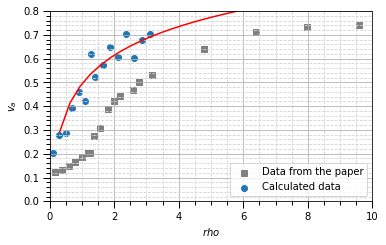

In [30]:
fig = plt.figure()
fig.set_size_inches(w=5.78851, h=3.5)
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlim([0,10])
ax1.set_ylim([0,0.8])

ax1.grid( which="both")

ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.xaxis.set_major_locator(AutoLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_major_locator(AutoLocator())

ax1.tick_params(which='both', width=1)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4, grid_linestyle="--", grid_color="lightgray")



ax1.set_xlabel('$rho$')
ax1.set_ylabel('$v_a$')

plt.scatter(xpaper,ypaper, c = 'grey',  marker = 's', s = 35, label = 'Data from the paper')
plt.scatter(xCalc, yCalc, label = 'Calculated data')
plt.plot(np.linspace(0,6,20), func(np.linspace(0,6,20),a,b,c), c = 'red')
plt.legend()
#plt.savefig('vaOfRhoCalc.pgf')

In [16]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [10]:
rho = (xCalc-rhoc)/rhoc
rho

array([-0.72407882, -0.17223645,  0.37960592,  0.93144829,  1.48329066,
        2.03513303,  2.5869754 ,  2.86289659,  3.5329909 ,  4.2030852 ,
        4.87317951,  5.54327381,  6.21336812,  6.88346243,  7.55355673])

In [22]:
lin = stats.linregress(np.log(rho[2:]),np.log(yCalc[2:]))
lin

LinregressResult(slope=0.39899731742774297, intercept=-1.3313675601081367, rvalue=0.9449471279139505, pvalue=1.1358767397274687e-06, stderr=0.041659112562857925, intercept_stderr=0.056433636186803485)

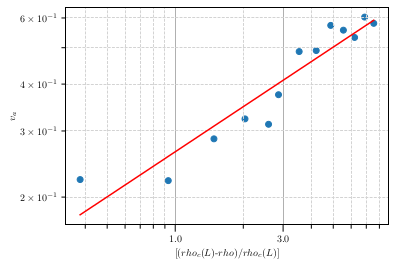

In [39]:
fig = plt.figure()
fig.set_size_inches(w=5.78851, h=4)
ax1 = fig.add_subplot(1,1,1)

ax1.grid( which="both")

ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.xaxis.set_major_locator(AutoLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_major_locator(AutoLocator())

ax1.tick_params(which='both', width=1)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4, grid_linestyle="--", grid_color="lightgray")

ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_xticks([0.1,0.3, 1, 3])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax1.set_xlabel('$[(rho_c(L)$-$rho)/rho_c(L)]$')
ax1.set_ylabel('$v_a$')


plt.scatter(rho[2:], yCalc[2:])
yfit = lin[0]*np.log(rho[2:])+lin[1]
plt.plot(rho[2:],np.exp(yfit), c = 'red')

plt.savefig('vaOfRhoCalcLn.pgf')